Spotify Music Hierarchical Clustering

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data and look at the first few rows:

In [17]:
# Load the dataset into a Pandas dataframe
data = pd.read_csv('tracks_features.csv' ,sep = ',', nrows=1000)
print(data.head())  # Print the first few rows of the dataframe
print(data.describe())   # Print summary statistics for each column
print(data.info())   # Print information about the dataframe, including the number of rows and columns, and the data types of each column

                       id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj'] 

Preprocessing the dataset

array([[<AxesSubplot: title={'center': 'track_number'}>,
        <AxesSubplot: title={'center': 'disc_number'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'year'}>]], dtype=object)

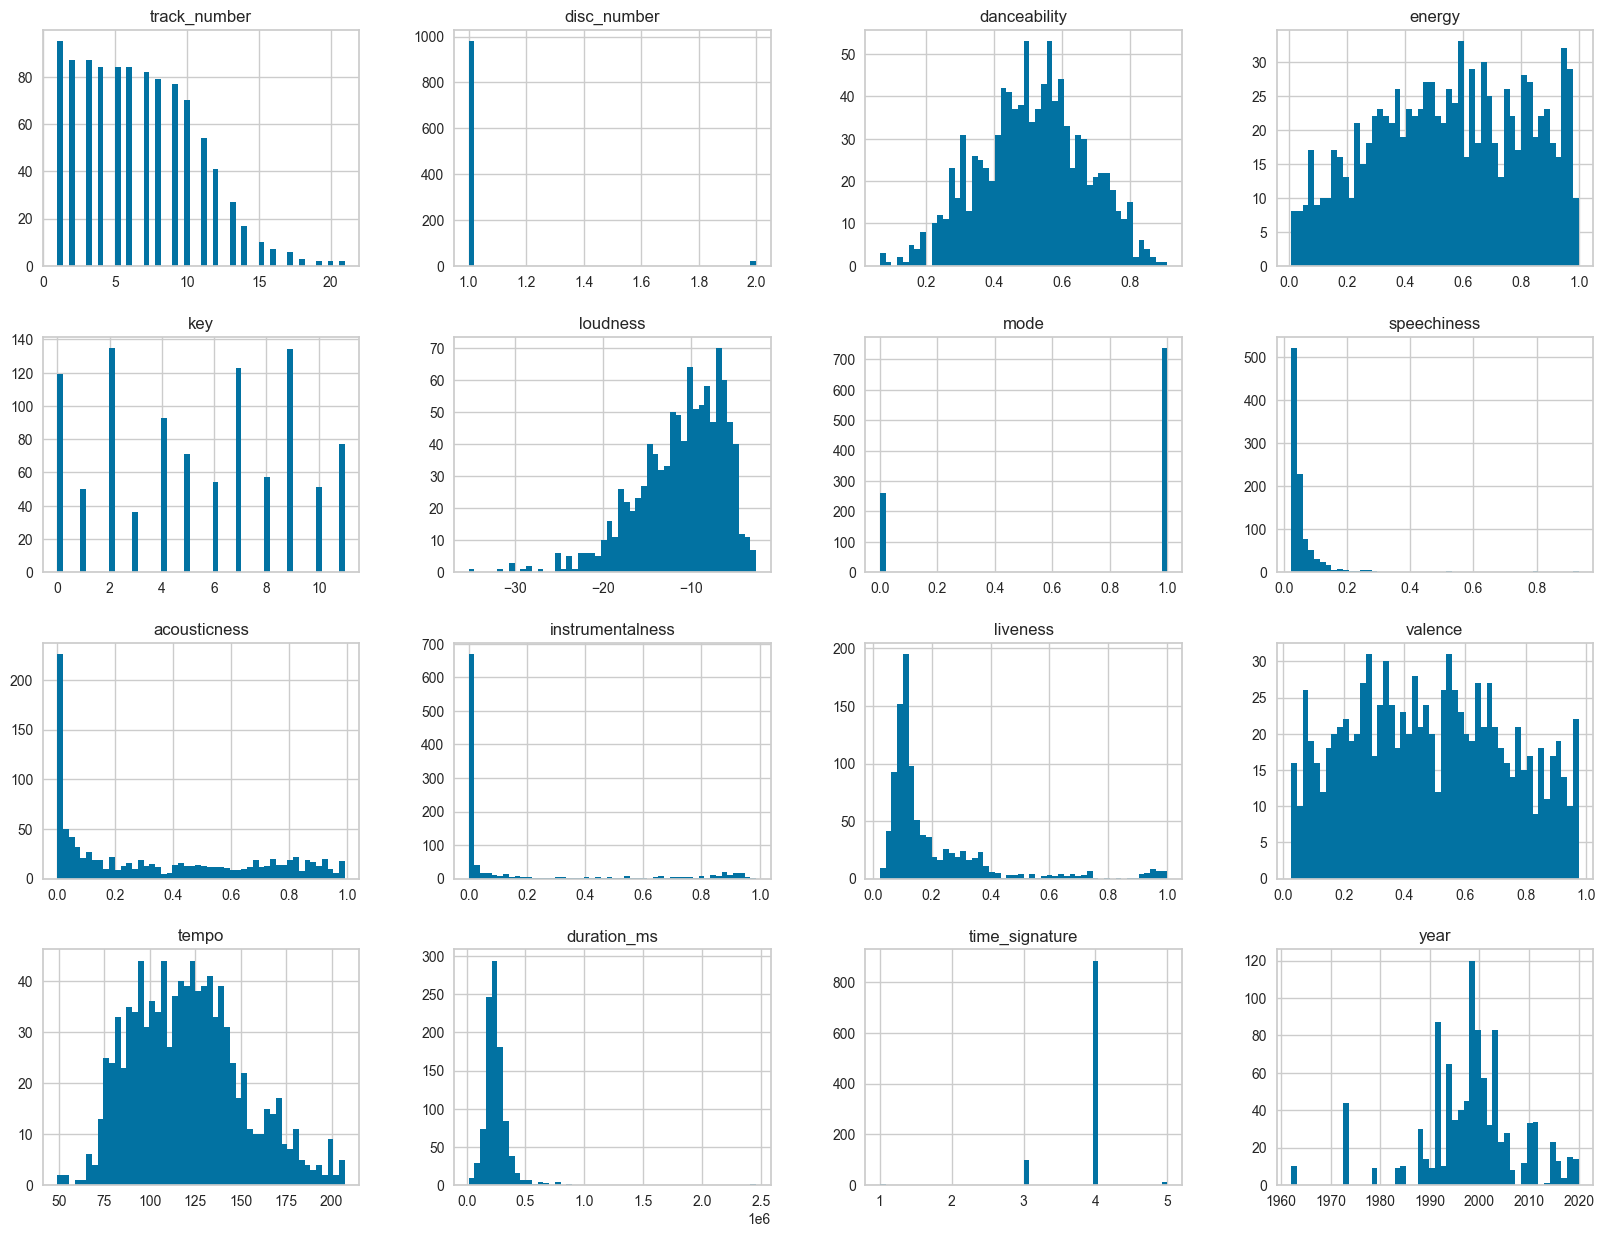

In [18]:
data.hist(bins=50, figsize=(20,15))   # Plot a histogram for each numerical attribute

In [19]:
# checking for null values
data.isnull().sum()

# Remove any rows with missing or invalid values
data.dropna(inplace=True)

# Select a subset of columns to use in the clustering process
columns_to_use = ['danceability','tempo']
data = data[columns_to_use]

# Normalize the values of each column
data = (data - data.mean()) / data.std()

data = pd.DataFrame(data, columns=data.columns)

data.head()

,danceability,tempo
0,-0.279376,-0.095831
1,0.556812,-0.566660
2,-1.284097,0.958055
3,-0.473838,-0.795951
4,-0.564587,0.207099


 Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem

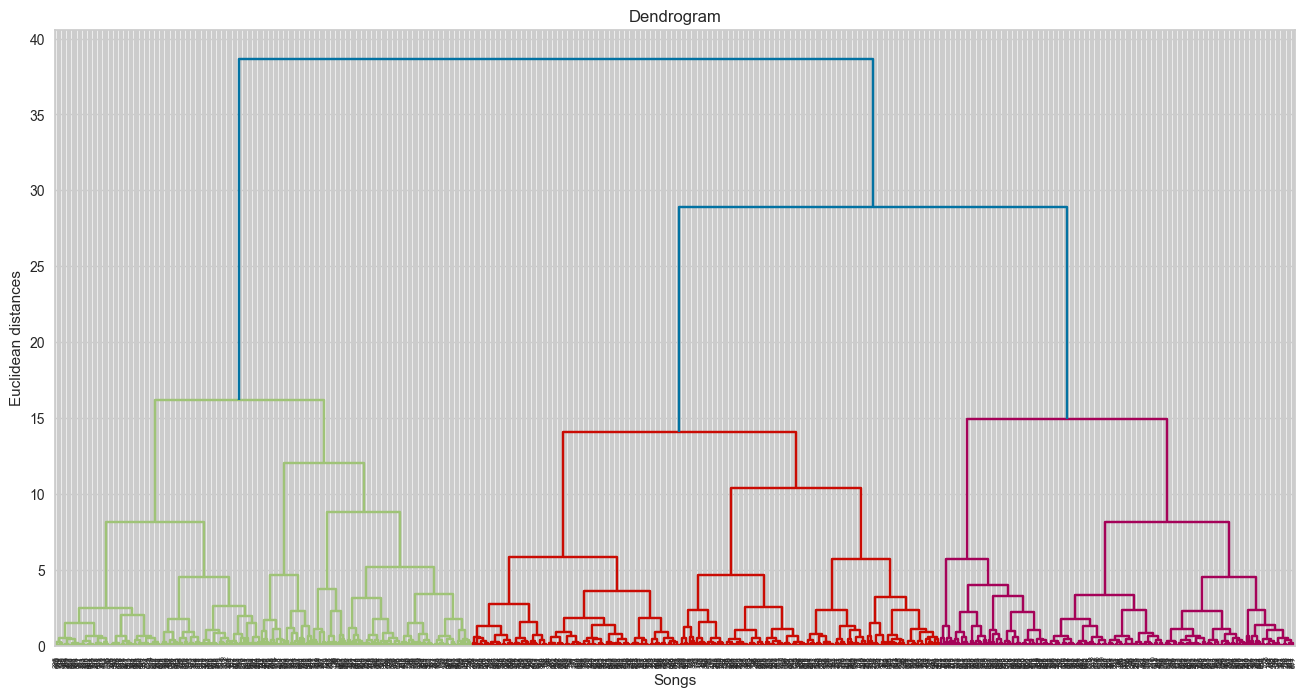

In [20]:
# importing the required module
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(1, figsize = (16 ,8))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
plt.show()

Using Elbow Method For Estimating Number Of Clusters

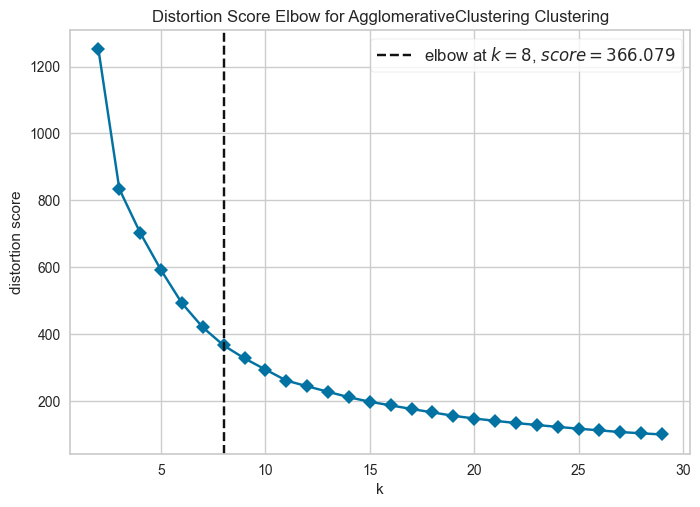

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(data)
# Finalize and render figure
visualizer.show()

Confirm the threshold

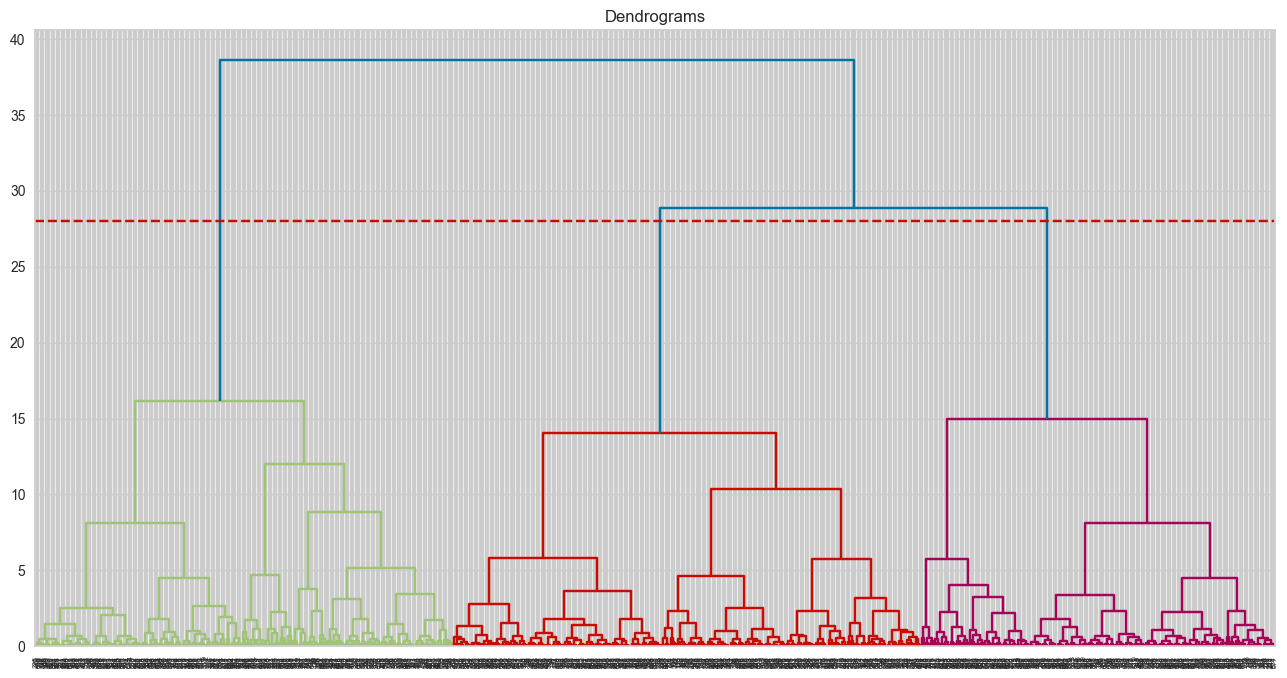

In [22]:

plt.figure(1, figsize = (16 ,8))
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.axhline(y=28, color='r', linestyle='--')

Apply hierarchical clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 8, metric = 'euclidean', linkage = 'ward')
X=cluster.fit_predict(data)

#data["Cluster"] = cluster.labels_
#data["Cluster"].value_counts()
data=data.values

Visualise

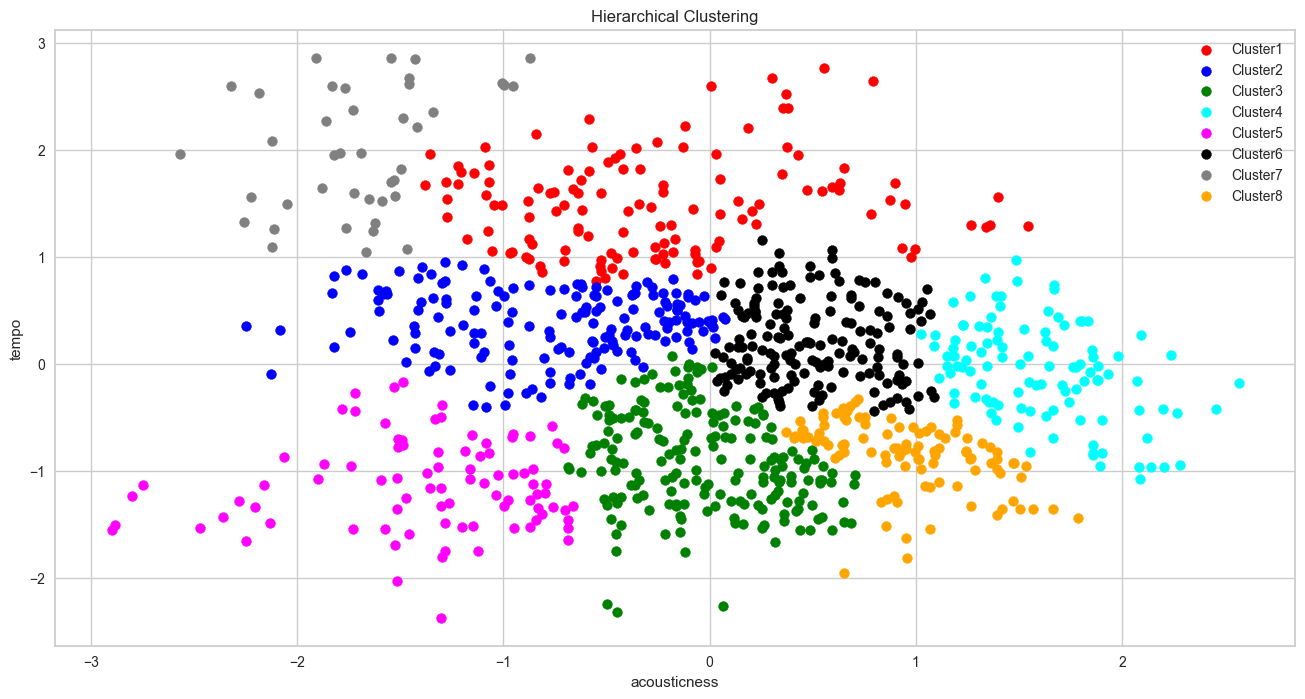

In [26]:

plt.figure(figsize=(16, 8))  

# plt.scatter(data['acousticness'], data['tempo'], c=cluster.labels_) 
# Plotting the results
plt.scatter(data[X == 0, 0], data[X == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(data[X == 1, 0], data[X == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(data[X == 2, 0], data[X == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(data[X == 3, 0], data[X == 3, 1], s = 50, c = 'cyan', label = 'Cluster4')
plt.scatter(data[X == 4, 0], data[X == 4, 1], s = 50, c = 'magenta', label = 'Cluster5')
plt.scatter(data[X == 5, 0], data[X == 5, 1], s = 50, c = 'black', label = 'Cluster6')
plt.scatter(data[X == 6, 0], data[X == 6, 1], s = 50, c = 'grey', label = 'Cluster7')
plt.scatter(data[X == 7, 0], data[X == 7, 1], s = 50, c = 'orange', label = 'Cluster8')
plt.title('Hierarchical Clustering')
plt.xlabel('acousticness')
plt.ylabel('tempo')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
 
   # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(data, X)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.2919153762958527
